# Definitions

Correlation is a measure of association between measured (random) variables. The Pearson's correlation coefficient quantifies the strength of this association on a simple scale: it varies between -1 and 1. The larger the absolute value of this correlation coefficient, the tighter the correlation and more predictive it is. The smaller the absolute value, the weaker the correlation and less predictive. Positive values imply a positive correlation: as I eat more ice cream, my weight goes up. Negative values imply a negative correlation: as I eat more ice cream, my weight goes down (wouldn't that be great!).

The Pearson's correlation coefficient is called parametric because it assumes a parametric form of the distributions of the two random variables, $X$ and $Y$; specifically, that both variables are [normally distributed](https://colab.research.google.com/drive/1-KxH3FCq5rDyyO33HXxewIv-kKldkINi?usp=sharing).

# Computing for a population

When you have full knowledge of the joint distribution of $𝑋$ and $Y$ (e.g., when working with an idealized model, not with real, finite data sets), the Pearson's correlation coefficient is typically denoted as $\rho$ and computed in terms of the covariance between the two variables, normalized by the product of their individual standard deviations:

$\quad\rho_{X,Y}=\frac{cov(X,Y)}{\sigma_x\sigma_y}$

where

$\quad cov(X,Y)=E\left [ (X-\mu_X)(Y-\mu_Y)\right ]$

in which $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$, respectively, and $E\left[\right]$ denotes expected value.

# Computing for a sample

When working with real data, you have a [sample, not a population](https://colab.research.google.com/drive/1SnVM1MPaFvMSjlDLyihgeZ25OAk-k4Nk?usp=sharing), and thus need to compute the correlation coefficient (typically denoted as *r*) using sample statistics.

## Sample Pearson's correlation coefficient

$\quad r_{X,Y}=\frac{\sum^n_{i-1}{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\sum^n_{i-1}{(x_i-\bar{x})^2}}\sqrt{\sum^n_{i-1}{(y_i-\bar{y})^2}}}$

where

$\quad \bar{x}=\frac{1}{n}\sum^n_{i=1}{x_i,\bar{y}}=\frac{1}{n}\sum^n_{i=1}{y_i}$

are the sample means.

## Coefficient of determination

It is possible to compute $r_{X,Y}$ not just when $X$ and $Y$ are two random variables, but also when one is a random (dependent) variable (typically $Y$) and the other is an independent or explanatory variable (typically $X$). In this case, the square of the correlation coefficient ($r^2$) quantifies the total variation in one variable ($Y$) that is explained by the regression line with respect to the other variable ($X$). This quantity is called the **coefficient of determination** and is often referred to as the fraction of explained variance

## Standard error of the sample Pearson's correlation coefficient

The standard error of the sample *r* is computed by assuming that r follows a [Student's t distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing) with two degrees of freedom (because of the two variables):

$\quad s_r=\sqrt{\frac{1-r^2}{n-2}}$

Note that "standard error" refers in general to the standard deviation of a statistical estimate, which here is *r*. It is not the same thing as the "standard error of the mean", which refers to the standard deviation of a statistical estimate of a mean.

## Confidence intervals for the sample Pearson's correlation coefficient

This is a bit tricker to compute, because r is not normally distributed, particularly around the extreme values (e.g., around 1, the distribution cannot go higher than one but can take many values <1). We therefore need to do the following (a good explanation is [here](http://faculty.washington.edu/gloftus/P317-318/Useful_Information/r_to_z/PearsonrCIs.pdf)):

1\. Take the Fisher's z-transformation of r:

$\quad z=0.5\times ln(\frac{1+r}{1-r})$

2\. Compute its standard deviation as:

$\quad s_z=\sqrt{\frac{1}{n-3}}$

3\. Compute confidence intervals in this z-space as we have shown [here](https://colab.research.google.com/drive/1rdJMusMZDTaM9OGsyt27tCVkSasmRj2O?usp=sharing), as:

$\quad z \pm (z\:criterion) \times s_z$

where the *z* criterion is determined from the desired confidence value using a [z-score calculator](http://www.z-table.com) or [norminv](https://www.mathworks.com/help/stats/norminv.html) in Matlab.

4\. Then translate each *z* value back to *r* as:

$\quad r=\frac{e^{2z}-1}{e^{2z}+1}$


## Hypothesis testing on the sample Pearson's correlation coefficient

For $H_0: r=0$. Here we are considering a null distribution that is centered at *r*=0. In this case, we know that the distribution of *r* around that mean is symmetric, and the sample mean follows follows a [Student's *t* distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing).  Therefore, our test statistic is simply the *t* statistic, which we compute as the residual (with respect to zero) of *r* divided by its standard error:

$\quad t=\frac{r}{s_r}$

with $n-2$ degrees of freedom.

For $H_0: r=r_s,\:where\:r_s\ne 0$. Here we are considering null distributions that are not centered at $r=0$ and therefore are not symmetric and do not follow a *t* distribution. We therefore first compute the *z* transformation of $r$ and $r_s$, as above. Now our test statistic is:

$\quad \lambda =\frac{z_r-z_{rs}}{\sqrt{\frac{1}{n-3}}}$

with $n-2$ degrees of freedom.



# Exercises

Code generated and debugged with the help of ChatGPT: https://chatgpt.com/share/66f19dbd-e710-800f-afb7-799f77f806fa

Let's examine the relationship between these two measured variables:

Wing length | Tail length
--- | ---
10.4 | 7.4
10.8 | 7.6
11.1 | 7.9
10.2 | 7.2
10.3 | 7.4
10.2 | 7.1
10.7 | 7.4
10.5 | 7.2
10.8 | 7.8
11.2 | 7.7
10.6 | 7.8
11.4 | 8.3

Assume Wing length is the $X$ variable and Tail Length is the $Y$ variable, both measured in cm.

Answers to the questions below will be found [here](https://github.com/PennNGG/Quantitative-Neuroscience/tree/master/Answers%20to%20Exercises/Python) after the due date.

##### 1\. Plot X vs Y. Do they look related?

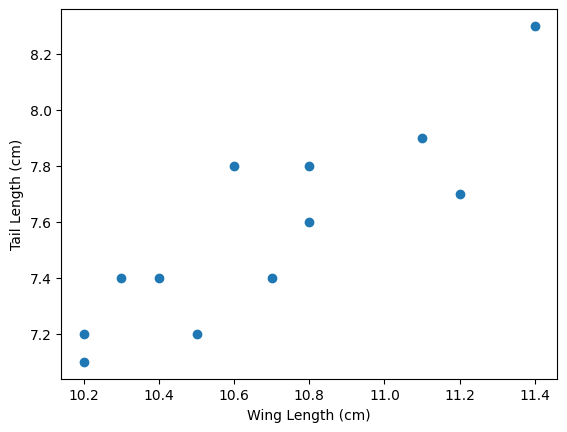

In [2]:
#import correct libraries
import numpy
import matplotlib.pyplot as plt

#make arrays with the values
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

#make a scatter plot with the data
plt.scatter(wing_length, tail_length)
plt.xlabel('Wing Length (cm)')
plt.ylabel('Tail Length (cm)')
plt.show()


X and Y look like they could potentially be related, as it seems that as wing length increases tail length increases as well.

##### 2\. Calculate $r_{X,Y}$ and $r_{Y,X}$, first using the equations above and then using either the Python numpy funciton [corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) or Matlab's built-in [corrcoef](https://www.mathworks.com/help/matlab/ref/corrcoef.html). Did you get the same answers?

In [6]:
#import correct libraries
import numpy as np

#make arrays with the values
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

#pearson's correlation coefficient, using above equation
#use arrays made above, designate as x and y
x = wing_length
y = tail_length

def pearson_correlation(x, y):
    #calculate means of x and y
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    #calculate the covariance (numerator)
    numerator = np.sum((x - mean_x) * (y - mean_y))

    #calculate the denominator
    denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))

    #pearson's correlation coefficient for xy
    r_xy = numerator / denominator

    return r_xy
#do the correlation for both cases, switching the x and y will account for both cases asked for
r_xy = pearson_correlation(x, y)
r_yx = pearson_correlation(y, x)

#print results
print(f"Pearson's correlation coefficient r_x,y: {r_xy}")
print(f"Pearson's correlation coefficient r_y,x: {r_yx}")


Pearson's correlation coefficient r_x,y: 0.8703545613058226
Pearson's correlation coefficient r_y,x: 0.8703545613058226


In [7]:
#use numpy's corrcoef for determining
import numpy as np

#make arrays with the values
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

#use arrays made above, designate as x and y
x = wing_length
y = tail_length

#compute the correlation matrix
correlation_matrix_xy = np.corrcoef(x, y)
correlation_matrix_yx = np.corrcoef(y, x)

#extracting the Pearson correlation coefficient for each xy and yx
r_xy = correlation_matrix_xy[0, 1]
r_yx = correlation_matrix_yx[0, 1]

#print results
print(f"Pearson's correlation coefficient r_x,y: {r_xy}")
print(f"Pearson's correlation coefficient r_x,y: {r_yx}")


Pearson's correlation coefficient r_x,y: 0.8703545613058227
Pearson's correlation coefficient r_x,y: 0.8703545613058227


##### 3\. What is the standard error of $r_{X,Y}$? The 95% confidence intervals computed from the standard error?

In [10]:
import numpy as np

#compute the standard error of rxy
#standard error= sqrt{frac{1-r^2}{n-2}}
#use n = 12 because that is how many samples we have
standard_error = np.sqrt((1 - r_xy**2) / (12 - 2))


#print results
print(f"Standard Error of r_x,y: {standard_error}")

#compute the 95% confidence interval using the standard error just calculated
def confidence_interval(mean, standard_error, confidence_level=0.95):
    #define the z value for 95% confidence interval (from the standard normal distribution)
    z_value = 1.96  # For 95% confidence level

    #calculate the margin of error
    margin_of_error = z_value * standard_error

    #compute the lower and upper bounds of the confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return lower_bound, upper_bound

#use values computed for standard error above, and calculate the mean of wing length (not sure if this is the correct use of the mean ???)
standard_error
mean = np.mean(wing_length)

# Compute 95% confidence interval
ci_lower, ci_upper = confidence_interval(mean, standard_error)

print(f"95% Confidence Interval: [{ci_lower}, {ci_upper}]")


Standard Error of r_x,y: 0.15571863652567375
95% Confidence Interval: [10.378124805743012, 10.988541860923652]


##### 4\. Should the value of $r_{X,Y}$ be considered significant at the *p*<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for $H_0: r_{X,Y}=0$?

In [13]:
#run a two tailed test
import numpy as np
from scipy import stats

#make arrays with the values
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

#use arrays made above, designate as x and y
x = wing_length
y = tail_length

#perform pearson correlation (could also use same above)
r, p_value = stats.pearsonr(x, y)

#print the Pearson correlation coefficient and p-value
print(f"Pearson correlation coefficient: {r}")
print(f"P-value: {p_value}")

#check if the p-value is less than 0.05 (two-tailed test with alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (significant correlation).")
else:
    print("Fail to reject the null hypothesis (no significant correlation).")


Pearson correlation coefficient: 0.8703545613058227
P-value: 0.00023110594312057437
Reject the null hypothesis (significant correlation).


##### 5\. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate $𝐻_0: r=0.75$.

In [17]:
#import correct libraries
import numpy as np
from scipy import stats

#use the data from above (just copied to down here)
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

#pearson correlation coefficient between x and y (calculated above)
r_observed, _ = stats.pearsonr(wing_length, tail_length)

#hypothesized correlation coefficient
r_hypothesized = 0.75

#number of samples
n = 12

#fisher transformation
def fisher_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))

#Z values for observed and hypothesized correlation coefficients
z_observed = fisher_z(r_observed)
z_hypothesized = fisher_z(r_hypothesized)

#standard error for the Z score
SE = 1 / np.sqrt(n - 3)

#Z-statistic for testing H0: r = 0.75
z_statistic = (z_observed - z_hypothesized) / SE

#two-tailed p-value from the Z-statistic
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_statistic)))

#print results
print(f"Observed Pearson correlation coefficient: {r_observed}")
print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

#check if p-value is less than alpha (0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (significant difference from r = 0.75).")
else:
    print("Fail to reject the null hypothesis (no significant difference from r = 0.75).")


Observed Pearson correlation coefficient: 0.8703545613058227
Z-statistic: 1.0847547271784326
P-value: 0.2780303018608832
Fail to reject the null hypothesis (no significant difference from r = 0.75).


##### 6\. Finally, calculate the statistical power and sample size needed to reject $H_0:r=0\:when\:r\ge 0.5$.

In [21]:
#import correct libraries
import numpy as np
from statsmodels.stats.power import NormalIndPower, tt_ind_solve_power

#set the parameters
effect_size = 0.5  #expected correlation under the alternative hypothesis
alpha = 0.05  #significance level (typically 0.05)
power = 0.80  #desired power (can change this and it'll change the sample size generated)

#calculate the Fisher Z-transformation of r
#stabilizes transformation, good for when sample sizes are small
def fisher_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))

#convert effect size to z
z_effect_size = fisher_z(effect_size)

#calculate the sample size needed
#NormalIndPower finds the value that satisfies the power equation
power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(effect_size=z_effect_size, alpha=alpha, power=power, alternative='larger')

print(f"Required sample size to detect r >= 0.5 with 80% power: {sample_size:.0f}")


Required sample size to detect r >= 0.5 with 80% power: 41


# Additional Resources


- Differences between correlation and regression are discussed [here](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression) and [here](http://www.biostathandbook.com/linearregression.html).

- A reference on [how to choose the appropriate measure of association](https://journals.sagepub.com/doi/pdf/10.1177/8756479308317006) (Khamis 2008).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania